In [17]:
import matplotlib.pyplot as plt

In [28]:
from sklearn.cluster import KMeans
import numpy as np

In [13]:
#!pip install dbfread
from dbfread import DBF
import pandas as pd
#from pandas import DataFrame

dbf_n = DBF(r'c:\Users\Zergo\jupyter\clustering\class_n.dbf')
df_n = pd.DataFrame(iter(dbf_n))
#print(df)
dbf_s = DBF(r'c:\Users\Zergo\jupyter\clustering\class_s.dbf')
df_s = pd.DataFrame(iter(dbf_s))

In [19]:
# Первый массив точек
x_n = df_n['x'].to_numpy()
y_n = df_n['y'].to_numpy()

# Второй массив точек
x_s = df_s['x'].to_numpy()
y_s = df_s['y'].to_numpy()

H:\Learning\Coding\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
H:\Learning\Coding\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[69.91356354 20.07025323]
 [71.12953542 -7.10610056]]


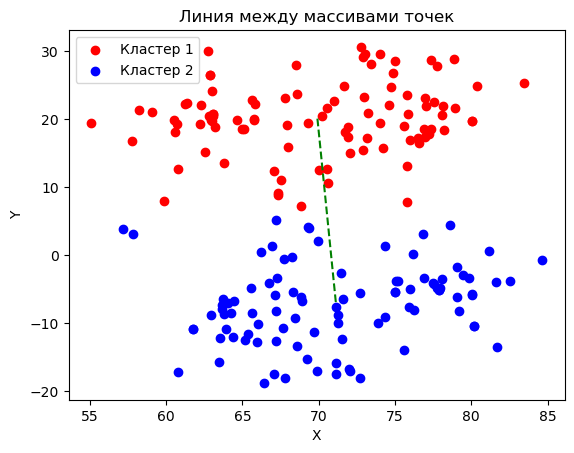

In [40]:
points = np.array(list(zip(x_n, y_n)) + list(zip(x_s, y_s)))
# Применение K-means алгоритма
kmeans = KMeans(n_clusters=2)
kmeans.fit(points)
# Координаты центров кластеров
centers = kmeans.cluster_centers_
# Получение меток кластеров
labels = kmeans.labels_
# Разделение массива точек на кластеры
cluster1 = points[labels == 0]
cluster2 = points[labels == 1]
# Построение разграничительной линии
plt.plot([centers[0][0], centers[1][0]], [centers[0][1], centers[1][1]], color='green', linestyle='--')
# Создание графика
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='red', label='Кластер 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='blue', label='Кластер 2')
# Построение линии
#plt.plot(line_x, line_y, color='green', linestyle='--')
# Нарисовать точки
#plt.scatter(x_n, y_n, color='blue', label='Массив 1')
#plt.scatter(x_s, y_s, color='red', label='Массив 2')

# Настроить график
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линия между массивами точек')
plt.legend()

# Показать график
plt.show()

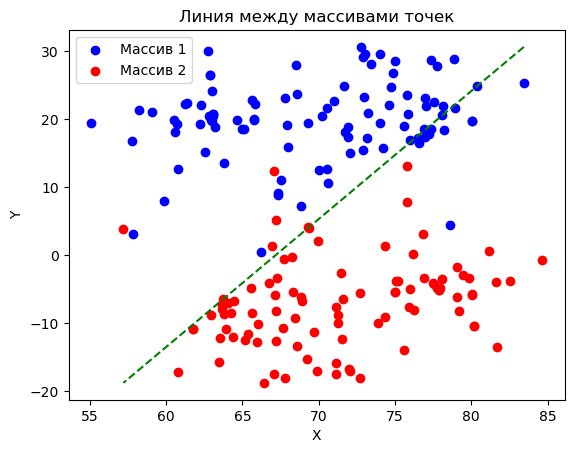

In [25]:
# Нарисовать точки
plt.scatter(x_n, y_n, color='blue', label='Массив 1')
plt.scatter(x_s, y_s, color='red', label='Массив 2')

# Провести линию между массивами
plt.plot([max(x_n), min(x_s)], [max(y_n), min(y_s)], color='green', linestyle='--')

# Настроить график
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линия между массивами точек')
plt.legend()

# Показать график
plt.show()

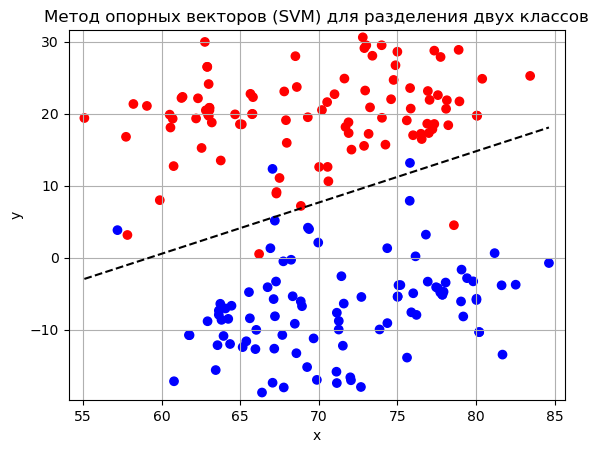

In [38]:
#Метод опорных векторов для разделения двух классов

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from dbfread import DBF
import pandas as pd

#from pandas import DataFrame
dbf_n = DBF(r'c:\Users\Zergo\jupyter\clustering\class_n.dbf')
df_n = pd.DataFrame(iter(dbf_n))
dbf_s = DBF(r'c:\Users\Zergo\jupyter\clustering\class_s.dbf')
df_s = pd.DataFrame(iter(dbf_s))

# Добавить столбец с весами
df_n["Weight"] = 1
df_s["Weight"] = -1

# Извлечение массивов точек и меток классов
df = pd.concat([df_n[['x', 'y']], df_s[['x', 'y']]]).values
weight = pd.concat([df_n["Weight"], df_s["Weight"]]).values

# Обучение модели SVM
model = SVC(kernel='linear')
model.fit(coordinates, weight)

# Получение коэффициентов разделяющей плоскости
w = model.coef_[0]
b = model.intercept_[0]

# Построение разделяющей линии
line_x = np.linspace(np.min(coordinates[:, 0]), np.max(coordinates[:, 0]), num=len(df))
line_y = (-w[0] / w[1]) * line_x - b / w[1]

# Визуализация данных и разделяющей линии
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=weight, cmap='bwr')
plt.plot(line_x, line_y, color='black', linestyle='--')

# Настройка внешнего вида графика
plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод опорных векторов (SVM) для разделения двух классов')
plt.xlim(np.min(coordinates[:, 0]) - 1, np.max(coordinates[:, 0]) + 1)
plt.ylim(np.min(coordinates[:, 1]) - 1, np.max(coordinates[:, 1]) + 1)
plt.grid(True)

# Отображение графика
plt.show()

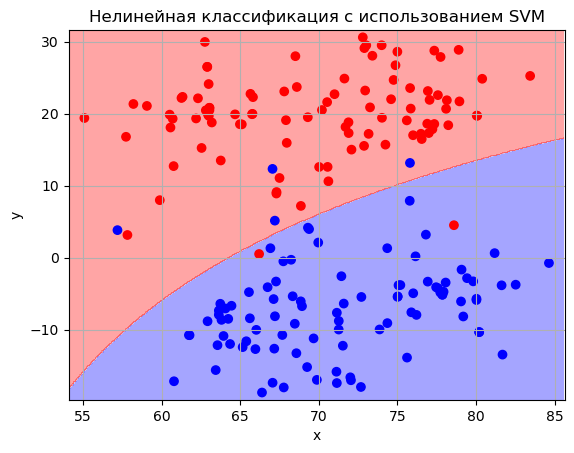

In [44]:
#Нелинейная классификация с использованием метода опорных векторов (Support Vector Machines, SVM)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from dbfread import DBF
import pandas as pd

#from pandas import DataFrame
dbf_n = DBF(r'c:\Users\Zergo\jupyter\clustering\class_n.dbf')
df_n = pd.DataFrame(iter(dbf_n))
dbf_s = DBF(r'c:\Users\Zergo\jupyter\clustering\class_s.dbf')
df_s = pd.DataFrame(iter(dbf_s))

# Добавить столбец с весами
df_n["Weight"] = 1
df_s["Weight"] = -1

# Извлечение массивов точек и меток классов
df = pd.concat([df_n[['x', 'y']], df_s[['x', 'y']]]).values
weight = pd.concat([df_n["Weight"], df_s["Weight"]]).values

# Обучение модели SVM с полиномиальным ядром
model = SVC(kernel='poly', degree=10)
model.fit(df, weight)

# Генерация сетки для построения разделяющей поверхности
x_min, x_max = df[:, 0].min() - 1, df[:, 0].max() + 1
y_min, y_max = df[:, 1].min() - 1, df[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Прогнозирование меток классов для каждой точки в сетке
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация данных и разделяющей поверхности
plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
plt.scatter(df[:, 0], df[:, 1], c=weight, cmap='bwr')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Нелинейная классификация с использованием SVM')
plt.grid(True)

# Отображение графика
plt.show()